In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [12]:
#1、拿去数据
x,y = load_iris(return_X_y=True)
print(x.shape) #(150,4) 150条数据，每条数据4个特征
print(y.shape) #（150）对应150个标签种类
print(y)       #打印可以看到只有3类花，取前两个0,1类
x = x[:100] #只有行，所以切片只留前100个就行
y = y[:100]

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
#2、数据拆分
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,shuffle=True)
print(train_x.shape)
print(train_y.shape)

(80, 4)
(80,)


In [18]:
#3、参数初始化、超参数准备 Wx + b = z
theta = np.random.randn(1,4)
bias = 0
print(theta)
lr = 1e-3
#lr = 1e-2
#epoch = 3000
epoch = 1000

[[ 0.00477816 -1.14445986  1.07411728 -0.4826397 ]]


In [21]:
#4、模型运算  向前传播
def forward(x,theta,bias):
    #Wx+b 线性层 linear
    z = np.dot(theta,train_x.T)
    #激活函数sigmoid
    y_hat=1/(1+np.exp(-z))
    
    return y_hat

In [27]:
#5、损失函数
def loss_function(y,y_hat):
    e = 1e-8
    return -y*np.log(y_hat + e) -(1-y)*np.log(1-y_hat +e)
#6、计算梯度
def calc_gradient(x,y,y_hat):
    m=x.shape[-1]   #（80,4） ==4
    delta_w = np.dot(y_hat-y,x)/m #预测值 - 真实值 与特征值 X 做矩阵运算，除以m个数
    delta_b = np.mean(y_hat - y)
    return delta_w, delta_b
n = 0
numlist = []
losslist = []
# 7、开始训练
for i in range(epoch):
    #正向转播
    y_hat = forward(train_x,theta,bias)
    #计算损失
    loss = np.mean(loss_function(train_y,y_hat))
    if i%100 ==0:
        numlist.append(n)
        losslist.append(loss)
        n += 1
        print(f'次数：{i}，损失:{loss}')
    #梯度下降
    dw,db = calc_gradient(train_x,train_y,y_hat)
    #更新参数
    theta -=lr*dw
    bias -= lr*db

次数：0，损失:0.031523948313503414
次数：100，损失:0.029241799438325604
次数：200，损失:0.027280892603138502
次数：300，损失:0.02557728896535985
次数：400，损失:0.02408300445094365
次数：500，损失:0.02276132198847037
次数：600，损失:0.02158366486088054
次数：700，损失:0.020527456688605502
次数：800，损失:0.019574623014820772
次数：900，损失:0.018710520760042097


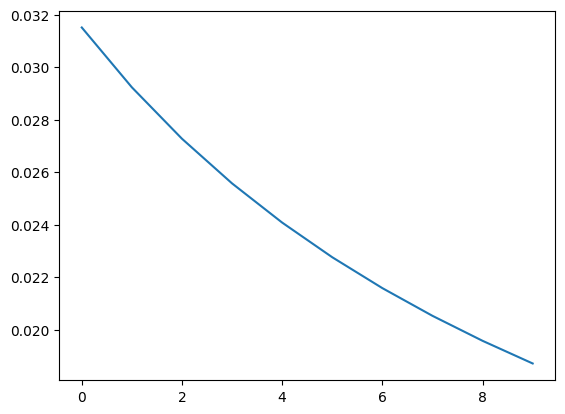

In [28]:
plt.plot(numlist,losslist)
plt.show()

In [42]:
# 推理
idx = np.random.randint(len(test_x))
x1 = test_x[idx]
y1 = test_y[idx]
pred = np.round(forward(x1,theta,bias))

print(f'预测：{pred[:,0]}，真实值：{y1}')


预测：[1.]，真实值：0


In [46]:
import pickle
model_params = {'W':theta,'b':bias}
with open('flowers.pkl','wb') as f:
    pickle.dump(model_params,f)

In [48]:
with open('flowers.pkl','rb') as f:
    f_params = pickle.load(f)
theta = f_params['W']
bias = f_params['b']
print(f'权重：{theta},偏置：{bias}')

权重：[[-0.23068146 -2.08205182  2.67909682  0.2574402 ]],偏置：-0.008320108802152103


In [64]:
#单独测试模型
with open('flowers.pkl','rb') as f:
    f_params = pickle.load(f)
theta = f_params['W']
bias = f_params['b']
def forward(train_x,theta,bias):
    z = np.dot(theta,train_x.T)
    t_hat = 1/(1+np.exp(-z))
    return t_hat
i = 0
predtest = np.round(forward(test_x,theta,bias))
for i in range(len(test_x)):
    if predtest[:,i] == test_y[i]:
        i += 1
print(f'acc:{i/len(test_y)}')

print(predtest)
print(test_y)
i

acc:1.0
[[0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.]]
[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1]


20

In [45]:
bias

-0.008320108802152103

In [49]:
theta

array([[-0.23068146, -2.08205182,  2.67909682,  0.2574402 ]])